In [1]:
import os
import numpy as np
import networkx as nx
import matching.glema.common.utils as utils
import matching.misc.cpg_const as cpg_const

In [2]:
args = utils.parse_args( use_default=True )
args.dataset = "CPG"
args.directed = True
args.iso = True
args.test_data = True

In [3]:
record_scopes = utils.get_record_scopes( args )
design_patterns = utils.get_design_patterns( args )
label_args = {
    "record_scopes": record_scopes,
    "design_patterns": design_patterns
}

In [4]:
source_graph_idx = 8
query_subgraph_idx = 0

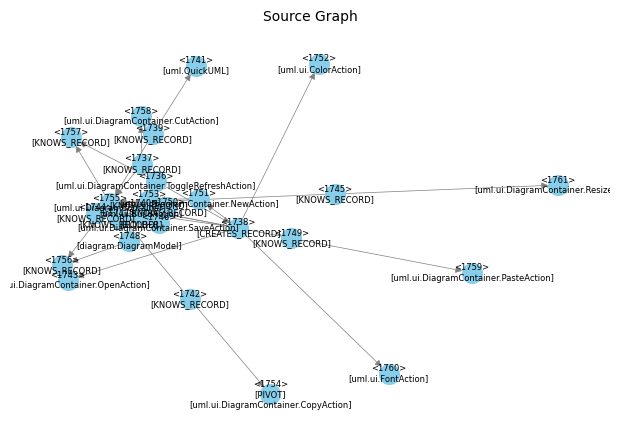

In [5]:
source = utils.load_source_graph( args, source_graph_idx )
utils.plot_graph( source,
                  title="Source Graph",
                  nodeLabels=utils.get_node_labels( source, **label_args ) )

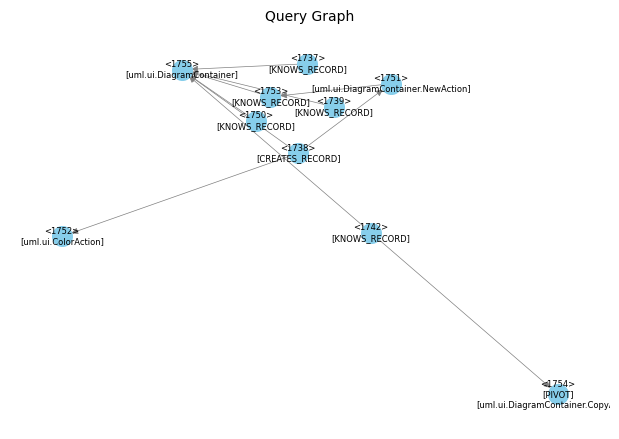

In [6]:
query = utils.load_query_graph( args, source_graph_idx, query_subgraph_idx )
utils.plot_graph( query,
                  title="Query Graph",
                  nodeLabels=utils.get_node_labels( query, **label_args ) )

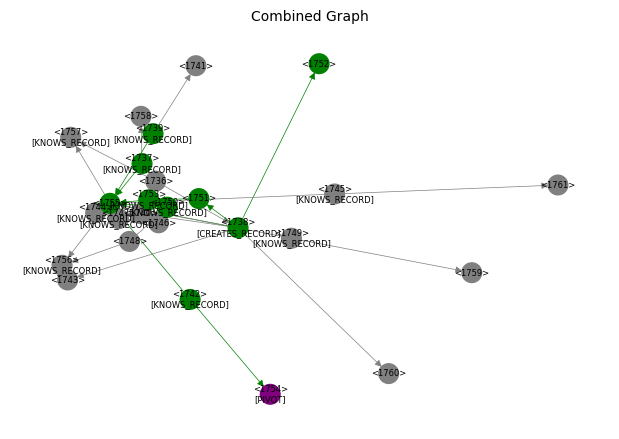

In [7]:
matching_colors = {
    2: "purple",
    1: "green",
    0: "grey",
    -1: "red"
}
combined, node_colors, edge_colors = utils.combine_graph( source, query,
                                                          matching_colors=matching_colors )
utils.plot_graph(
    title="Combined Graph",
    graph=combined,
    nodeColors=node_colors,
    edgeColors=edge_colors,
    nodeLabels=utils.get_node_labels( combined )
)

In [8]:
args.test_data = True
args.iso = True
total_pivots_queries = 0
total_queries = 0
for source_graph_idx, source_graph in utils.load_source_graphs( args ).items():
    pivots_queries_per_source = 0
    queries_per_source = 0
    for query_graph_idx, query_graph in utils.load_query_graphs( args, source_graph_idx ).items():
        
        _, node_matches, _ = utils.combine_graph( source_graph, query_graph )
        
        has_pivot = any( node_match == 2 for node_match in node_matches )
        if has_pivot:
            pivots_queries_per_source += 1
            total_pivots_queries += 1
        queries_per_source += 1
        total_queries += 1
    print( f"Queries with pivots found for source #{source_graph_idx}: {pivots_queries_per_source}/{queries_per_source}" )
print( f"Queries with pivots found: {total_pivots_queries}/{total_queries}" )

Queries with pivots found for source #0: 32/32
Queries with pivots found for source #1: 37/37
Queries with pivots found for source #2: 29/29
Queries with pivots found for source #3: 36/36
Queries with pivots found for source #4: 27/27
Queries with pivots found for source #5: 39/39
Queries with pivots found for source #6: 27/27
Queries with pivots found for source #7: 30/30
Queries with pivots found for source #8: 26/26
Queries with pivots found for source #9: 30/30
Queries with pivots found for source #10: 32/32
Queries with pivots found for source #11: 33/33
Queries with pivots found for source #12: 35/35
Queries with pivots found for source #13: 34/34
Queries with pivots found for source #14: 25/25
Queries with pivots found for source #15: 30/30
Queries with pivots found for source #16: 36/36
Queries with pivots found for source #17: 33/33
Queries with pivots found for source #18: 34/34
Queries with pivots found for source #19: 28/28
Queries with pivots found for source #20: 29/29
Qu